<a href="https://colab.research.google.com/github/AdamPoi/PCVK/blob/main/PCVK_week06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 6 HISTOGRAM

2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from google.colab import drive
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Menampilkan Histogram dari Sebuah Gambar

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di
bawah ini : (Gunakan gambar lena.jpg)

<BarContainer object of 256 artists>

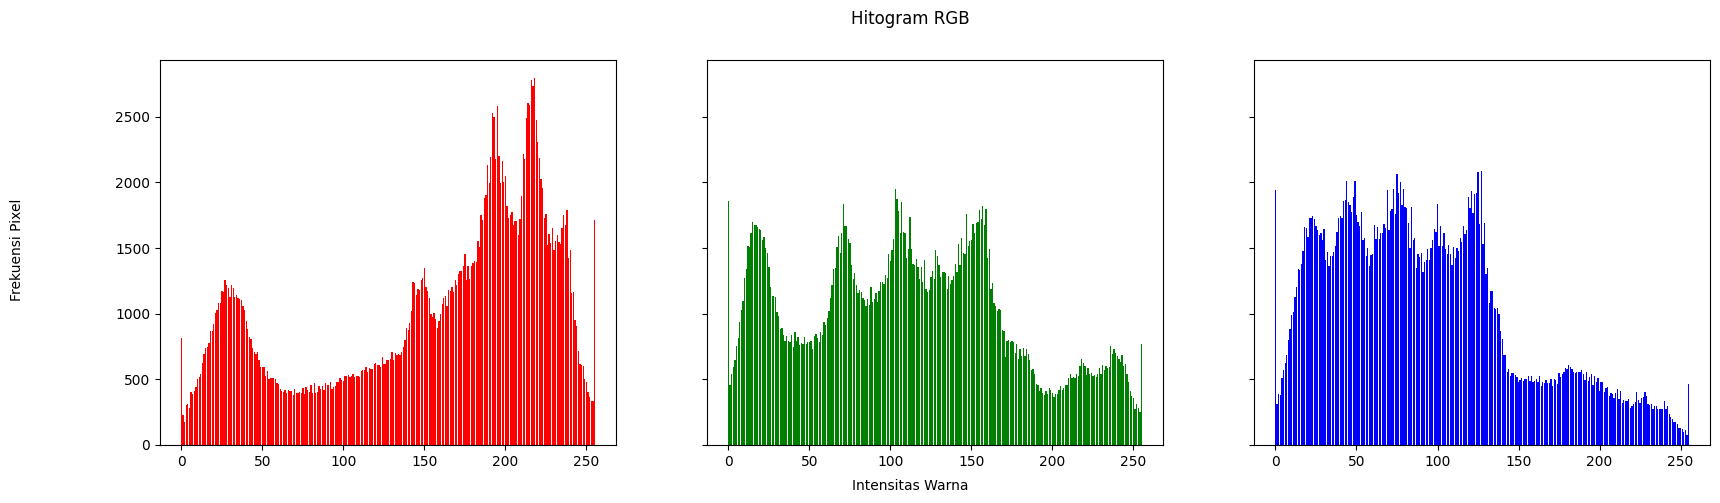

In [57]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
height, width, depth = np.shape(img)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0, width):
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Hitogram RGB')
fig.text(0.05, 0.5, 'Frekuensi Pixel', va='center', rotation='vertical')
fig.text(0.5, 0.02, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

### Menggunakan Numpy

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?

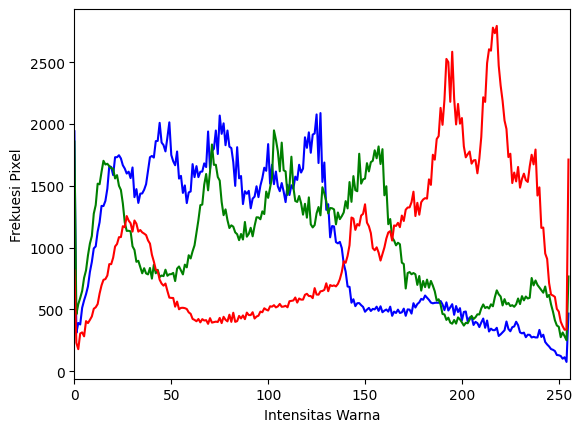

In [44]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
colors = ("b", "g", "r")
channel_ids = (0,1,2)

plt.xlim([0,256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        img[:,:, channel_id], bins=256, range=(0,256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.ylabel("Frekuesi Pixel")
plt.xlabel("Intensitas Warna")

plt.show()

### Menggunakan OpenCV2


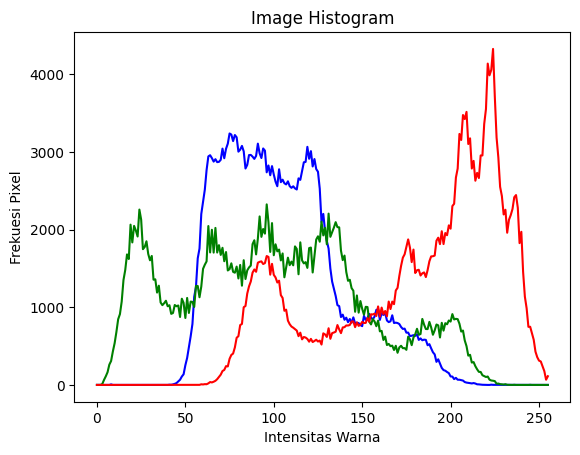

In [35]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

def histColor(img):
  colors = ("b", "g", "r")
  channel_ids = (0,1,2)
  hists = []

  for i,color in enumerate(colors):
    hist = cv.calcHist([img],channels=[i],mask=None,histSize=[256],ranges=[0,256])
    plt.plot(hist,color = color)
  plt.title('Image Histogram')
  plt.ylabel("Frekuesi Pixel")
  plt.xlabel("Intensitas Warna")
  plt.show()

histColor(img)



## Histogram Equalizations

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

In [61]:
def getHistogram(img1):
  height, width, depth = np.shape(img1)
  hist = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      hist[0][img1[y][x][0]] += 1
      hist[1][img1[y][x][1]] += 1
      hist[2][img1[y][x][2]] += 1
  return hist

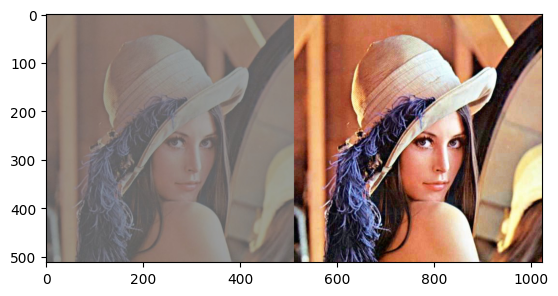

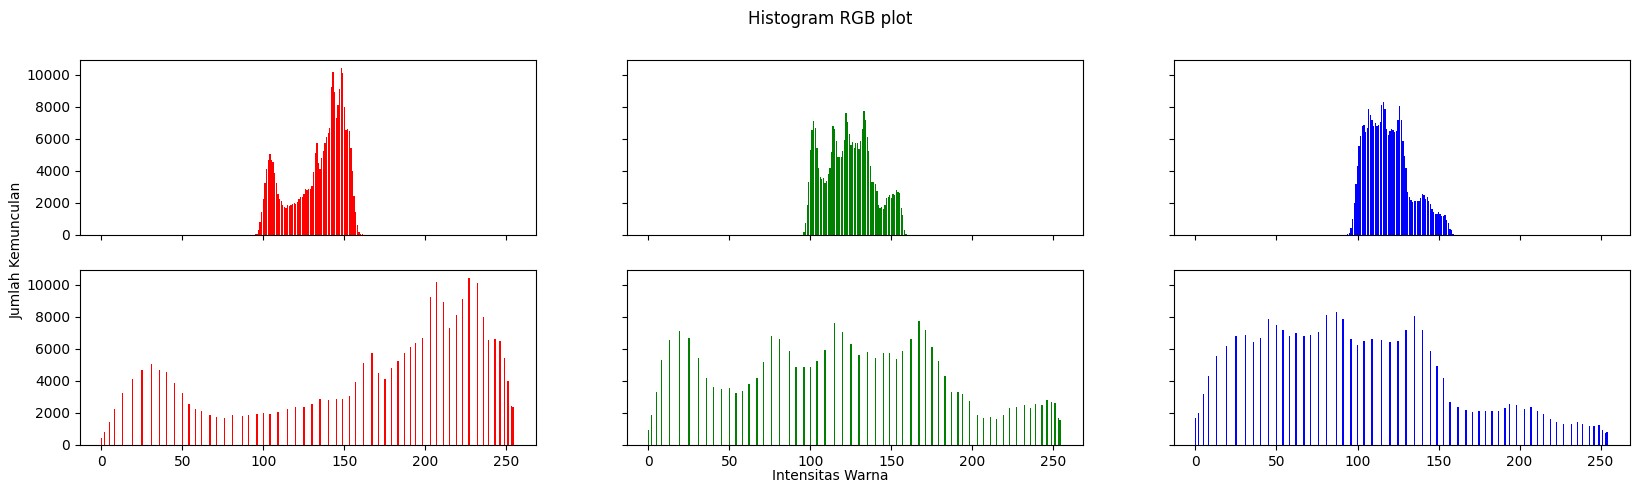

In [66]:

img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

histo_asli = getHistogram(img)

#convert to Numpy array
img_array = np.asarray(img)

#Step 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

#Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#Step 3: Transformation
# flatten image array into 10 list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = getHistogram(img2)

final_frame = cv.hconcat((cv.cvtColor(img,cv.COLOR_BGR2RGB), cv.cvtColor(img2,cv.COLOR_BGR2RGB))) #concatenate image
plt.imshow(final_frame)

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
    fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0,0].bar(names, histo_asli[2], color='red')
    axs[0,1].bar(names, histo_asli[1], color='green')
    axs[0,2].bar(names, histo_asli[0], color='blue')
    axs[1,0].bar(names, equal_histo[2], color='red')
    axs[1,1].bar(names, equal_histo[1], color='green')
    axs[1,2].bar(names, equal_histo[0], color='blue')
else:
    fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=Trbe, sharey=True)
    fig. suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
    axs[0,0].bar(names, histo_asli[2], color='gray')

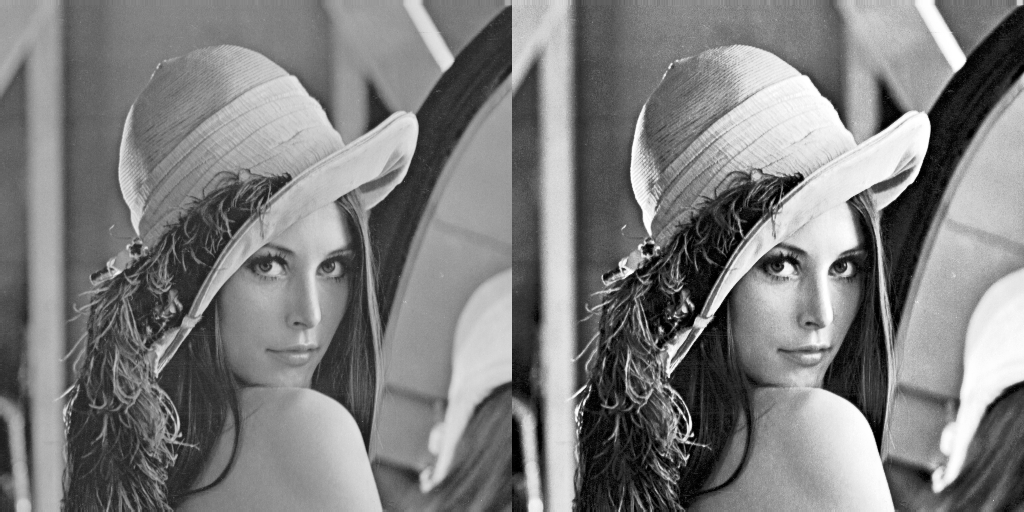

In [29]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lenna.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
equ = cv.equalizeHist(gray)
res = np.hstack((gray, equ))
cv2_imshow(res)


6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan . tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?

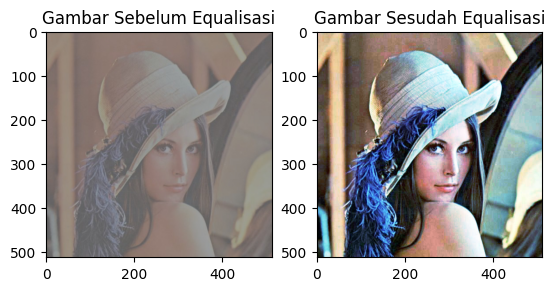

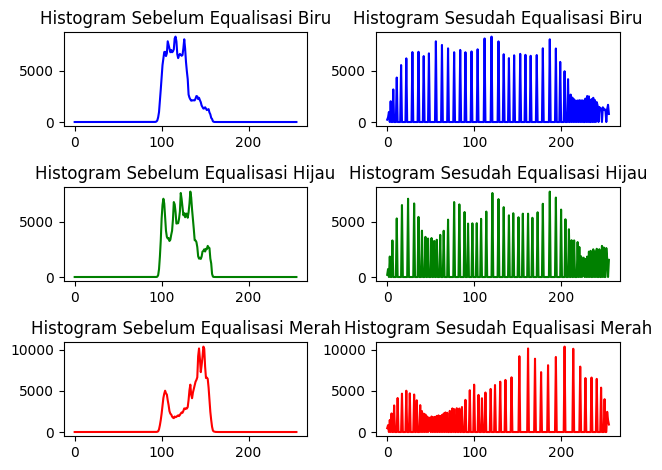

In [67]:
# Baca gambar
image = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

# memisahkan saluran warna
blue_channel, green_channel, red_channel = cv.split(image)

# Equalization histogram pada setiap saluran warna
blue_equalized = cv.equalizeHist(blue_channel)
green_equalized = cv.equalizeHist(green_channel)
red_equalized = cv.equalizeHist(red_channel)

# Gabungkan kembali setiap saluran warna
equalized_image = cv.merge((blue_equalized, green_equalized, red_equalized))

# Hitung histogram sebelum dan sesudah equalisasi
hist_before_blue = cv.calcHist([image], [0], None, [256], [0, 256])
hist_before_green = cv.calcHist([image], [1], None, [256], [0, 256])
hist_before_red = cv.calcHist([image], [2], None, [256], [0, 256])
hist_after_blue = cv.calcHist([equalized_image], [0], None, [256], [0, 256])
hist_after_green = cv.calcHist([equalized_image], [1], None, [256], [0, 256])
hist_after_red = cv.calcHist([equalized_image], [2], None, [256], [0, 256])

# Tampilkan gambar sebelum dan sesudah equalisasi
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Gambar Sebelum Equalisasi')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(equalized_image, cv.COLOR_BGR2RGB))
plt.title('Gambar Sesudah Equalisasi')

plt.show()

# Tampilkan histogram sebelum dan sesudah equalisasi pisahkan setiap warnanya
plt.subplot(3, 2, 1)
plt.plot(hist_before_blue, color='b')
plt.title('Histogram Sebelum Equalisasi Biru')

plt.subplot(3, 2, 2)
plt.plot(hist_after_blue, color='b')
plt.title('Histogram Sesudah Equalisasi Biru')

plt.subplot(3, 2, 3)
plt.plot(hist_before_green, color='g')
plt.title('Histogram Sebelum Equalisasi Hijau')

plt.subplot(3, 2, 4)
plt.plot(hist_after_green, color='g')
plt.title('Histogram Sesudah Equalisasi Hijau')

plt.subplot(3, 2, 5)
plt.plot(hist_before_red, color='r')
plt.title('Histogram Sebelum Equalisasi Merah')

plt.subplot(3, 2, 6)
plt.plot(hist_after_red, color='r')
plt.title('Histogram Sesudah Equalisasi Merah')

plt.tight_layout()

plt.show()

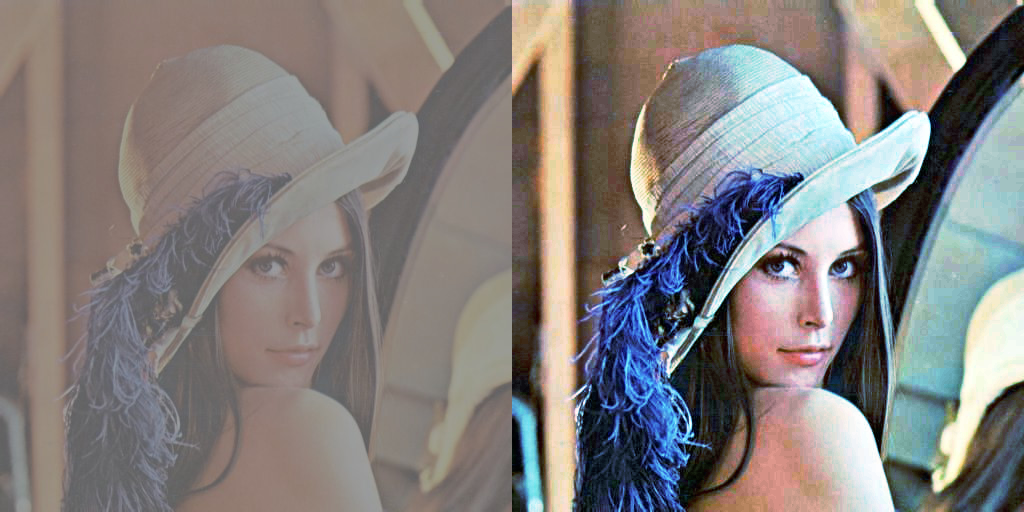

In [62]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')
channels = cv.split(img)
equ=[]
for ch, color in zip(channels, ["r", "g", "b"]):
  equ.append(cv.equalizeHist(ch))
eq_image = cv.merge(equ)
equal_histo = getHistogram(eq_image)

final_frame = cv.hconcat((img, eq_image))
cv2_imshow(final_frame)

### Menggunakan YUV

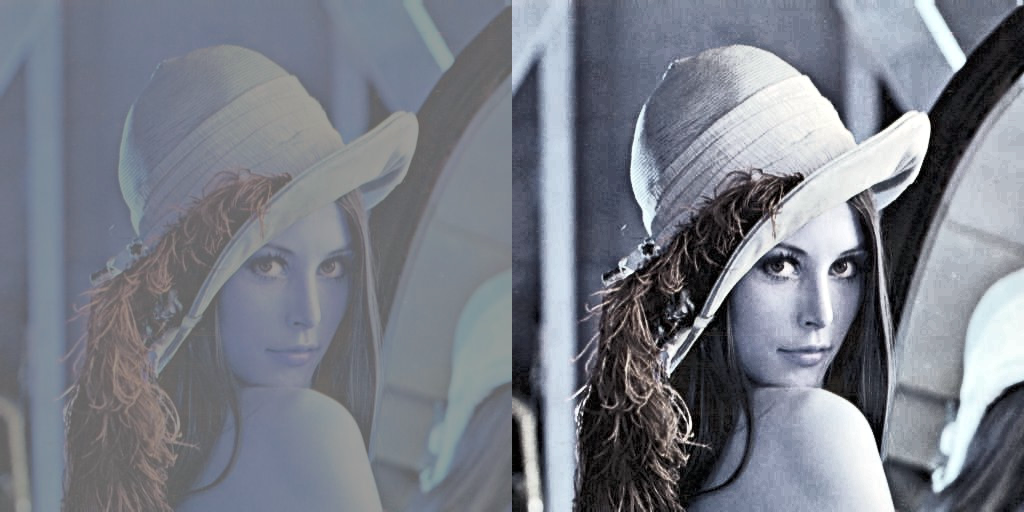

In [63]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
yuv = cv.cvtColor(img, cv.COLOR_RGB2YUV)
yuv[:,:,0] = cv.equalizeHist(yuv[:,:,0])
eq_image =cv.cvtColor(yuv, cv.COLOR_YUV2RGB)

final_frame = cv.hconcat((img, eq_image))
cv2_imshow(final_frame)




## Pemetaan Warna

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)

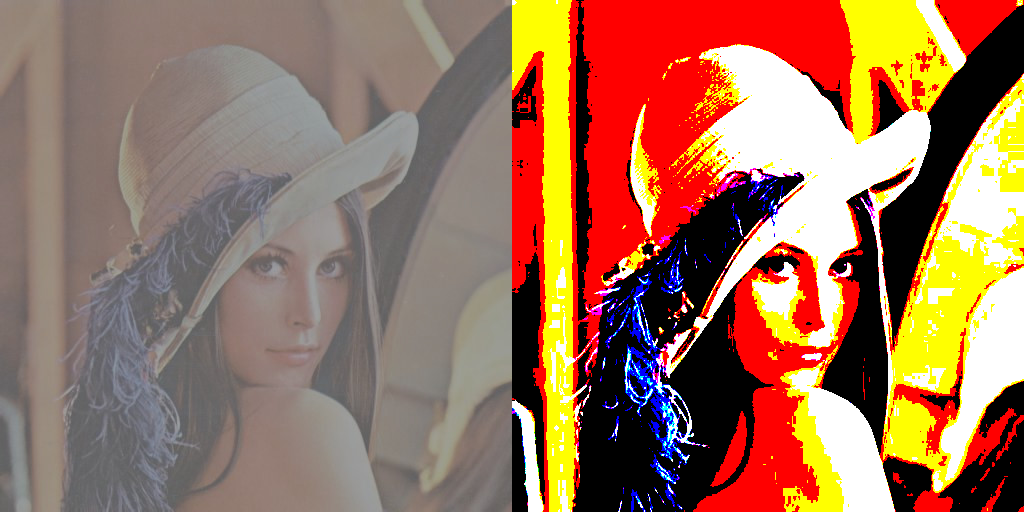

In [70]:
def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
image_16 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_8 = np.zeros(image_16.shape, image_16.dtype)

for y in range(0, image_16.shape[0]):
  for x in range(0, image_16.shape[1]):
    baru = warnaTerdekat(image_16[y, x, 0], image_16[y, x, 1], image_16[y, x, 2])
    image_8[y, x] = warnaPallette[baru]

image_16 = cv.cvtColor(image_16, cv.COLOR_BGR2RGB)
image_8 = cv.cvtColor(image_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((image_16, image_8))
cv2_imshow(final_frame)


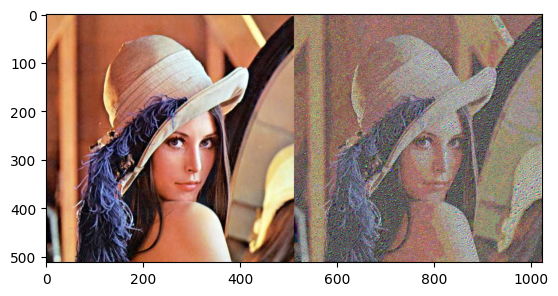

In [148]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

dithered_image = cv.cvtColor(original, cv.COLOR_BGR2RGB)
height,width,deepth = dithered_image.shape

for y in range(height - 1):
    for x in range(width - 1):
        old_pixel_blue = dithered_image[y, x, 0]
        old_pixel_green = dithered_image[y, x, 1]
        old_pixel_red = dithered_image[y, x, 2]

        pixel_distance=1
        new_pixel_blue = np.round(pixel_distance * (old_pixel_blue/255))*(255/pixel_distance)
        new_pixel_green = np.round(pixel_distance * (old_pixel_green/255))*(255/pixel_distance)
        new_pixel_red = np.round(pixel_distance * (old_pixel_red/255))*(255/pixel_distance)

        error_blue = old_pixel_blue - new_pixel_blue
        error_green = old_pixel_green - new_pixel_green
        error_red = old_pixel_red - new_pixel_red

        if x < dithered_image.shape[1] - 1:
            dithered_image[y, x + 1, 0] = dithered_image[y, x + 1, 0] + error_blue * 7 / 16
            dithered_image[y, x + 1, 1] = dithered_image[y, x + 1, 1] + error_green * 7 / 16
            dithered_image[y, x + 1, 2] = dithered_image[y, x + 1, 2] + error_red * 7 / 16
        if x > 0 and y < dithered_image.shape[0] - 1:
            dithered_image[y + 1, x - 1, 0] = dithered_image[y + 1, x - 1, 0] + error_blue * 3 / 16
            dithered_image[y + 1, x - 1, 1] = dithered_image[y + 1, x - 1, 1] + error_green * 3 / 16
            dithered_image[y + 1, x - 1, 2] = dithered_image[y + 1, x - 1, 2] + error_red * 3 / 16
        if y < dithered_image.shape[0] - 1:
            dithered_image[y + 1, x, 0] = dithered_image[y + 1, x, 0] + error_blue * 5 / 16
            dithered_image[y + 1, x, 1] = dithered_image[y + 1, x, 1] + error_green * 5 / 16
            dithered_image[y + 1, x, 2] = dithered_image[y + 1, x, 2] + error_red * 5 / 16
        if x < dithered_image.shape[1] - 1 and y < dithered_image.shape[0] - 1:
            dithered_image[y + 1, x + 1, 0] = dithered_image[y + 1, x + 1, 0] + error_blue * 1 / 16
            dithered_image[y + 1, x + 1, 1] = dithered_image[y + 1, x + 1, 1] + error_green * 1 / 16
            dithered_image[y + 1, x + 1, 2] = dithered_image[y + 1, x + 1, 2] + error_red * 1 / 16


final_frame = cv.hconcat((cv.cvtColor(original, cv.COLOR_BGR2RGB), dithered_image))
plt.imshow(final_frame)

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!

(-0.5, 511.5, 511.5, -0.5)

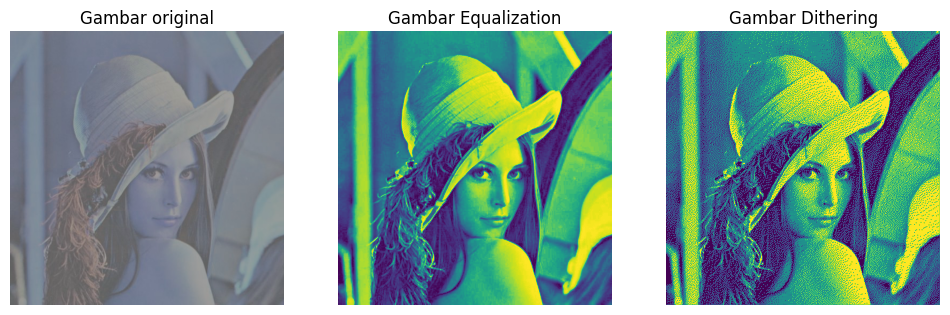

In [170]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
equ_image = cv.equalizeHist(gray_image)
dithered_image=equ_image.copy()

def threshold(n):
  if(n>255):n=255
  if(n<0):n=0
  return n

height,width = gray_image.shape
for y in range(height - 1):
    for x in range(width - 1):
        old_pixel = dithered_image[y, x]
        pixel_distance = 1
        new_pixel = np.round(pixel_distance * (old_pixel/255))*(255/pixel_distance)
        dithered_image[y, x] = new_pixel
        error = old_pixel - new_pixel

        if x < width - 1:
            new_value = dithered_image[y, x + 1] + error * 7 / 16
            dithered_image[y, x + 1] = threshold(new_value)

        if x > 0 and y < height - 1:
            new_value = dithered_image[y + 1, x - 1] + error * 3 / 16
            dithered_image[y + 1, x - 1] = threshold(new_value)

        if y < height - 1:
            new_value = dithered_image[y + 1, x] + error * 5 / 16
            dithered_image[y + 1, x] = threshold(new_value)

        if x < width - 1 and y < height - 1:
            new_value = dithered_image[y + 1, x + 1] + error * 1 / 16
            dithered_image[y + 1, x + 1] = threshold(new_value)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(cv.cvtColor(original,cv.COLOR_BGR2RGB))
axs[0].set_title('Gambar original')
axs[0].axis('off')
axs[1].imshow(cv.cvtColor(original,cv.COLOR_BGR2RGB))
axs[1].set_title('Gambar Equalization')
axs[1].axis('off')
axs[2].imshow(dithered_image)
axs[2].set_title('Gambar Dithering')
axs[2].axis('off')
